## Loading the librairies


In [267]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from scipy.stats import multivariate_normal
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

## Loading the datas

In [268]:
train_df = pd.read_csv('input/census_income_learn.csv')
test_df = pd.read_csv('input/census_income_test.csv')

## Overview of the datas

In [269]:
train_df.head()

,73,Not in universe,0,0.1,High school graduate,0.2,Not in universe.1,Widowed,Not in universe or children,Not in universe.2,...,United-States,United-States.1,United-States.2,Native- Born in the United States,0.7,Not in universe.8,2,0.8,95,- 50000.
0,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
1,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
2,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
3,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,...,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,- 50000.


We can see 41 features and 42th column is the labels. With the help of the txt file, we can name them.

In [270]:
train_df.columns = ['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MARSUPWT', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN', 'WKSWORK', 'YEAR','RESULT']
test_df.columns = ['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MARSUPWT', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN', 'WKSWORK', 'YEAR','RESULT']
del train_df['MARSUPWT'] #ignored as required in the txt file
del test_df['MARSUPWT'] #ignored as required in the txt file

I map the label column to 0 and 1 values to see the ratio between people below and above the 50k limit.

In [271]:
train_df['RESULT'] = train_df['RESULT'].astype(str).map({' - 50000.' : 0, ' 50000+.' : 1})
test_df['RESULT'] = test_df['RESULT'].astype(str).map({' - 50000.' : 0, ' 50000+.' : 1})

In [272]:
train_df.describe()

,AAGE,ADTIND,ADTOCC,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,NOEMP,SEOTR,VETYN,WKSWORK,YEAR,RESULT
count,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000
mean,34.494006,15.352397,11.306613,55.427186,434.721169,37.313975,197.530523,1.956190,0.175439,1.514830,23.175013,94.499669,0.062058
std,22.310785,18.067141,14.454218,274.897115,4697.542951,271.897097,1984.168581,2.365127,0.553696,0.851475,24.411494,0.500001,0.241262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,8.000000,94.000000,0.000000
75%,50.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000,0.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.000000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000,1.000000


Only 6% of the sampled population is over the limit.

When I looked at some random row to have an clearer idea of the features, I saw that the missing values seem not present as NaN but as '?' string. I'll confirm my thought by checking the missing values and in order to check more easely the '?' I switched the into string type.

In [273]:
print (train_df.loc[69])

AAGE                                        27
ACLSWKR         Self-employed-not incorporated
ADTIND                                      33
ADTOCC                                      16
AHGA                Bachelors degree(BA AB BS)
AHRSPAY                                      0
AHSCOL                         Not in universe
AMARITL                          Never married
AMJIND                            Retail trade
AMJOCC                                   Sales
ARACE                                    White
AREORGN                              All other
ASEX                                      Male
AUNMEM                         Not in universe
AUNTYPE                        Not in universe
AWKSTAT               Children or Armed Forces
CAPGAIN                                      0
CAPLOSS                                      0
DIVVAL                                       0
FILESTAT                                Single
GRINREG                              Northeast
GRINST       

I found 8 features with missing value.
4 of them miss in a small amount of case (~3.5% max)
4 of the in half of the case (~100000)
(same for the test_df)

In [274]:
print(train_df.loc[train_df['GRINST'].astype(str) == ' ?'].shape)
print(train_df.loc[train_df['PEFNTVTY'].astype(str) == ' ?'].shape)
print(train_df.loc[train_df['PEMNTVTY'].astype(str) == ' ?'].shape)
print(train_df.loc[train_df['PENATVTY'].astype(str) == ' ?'].shape)
print(train_df.loc[train_df['MIGMTR1'].astype(str) == ' ?'].shape)
print(train_df.loc[train_df['MIGMTR3'].astype(str) == ' ?'].shape)
print(train_df.loc[train_df['MIGMTR4'].astype(str) == ' ?'].shape)
print(train_df.loc[train_df['MIGSUN'].astype(str) == ' ?'].shape)

(708, 41)
(6713, 41)
(6119, 41)
(3393, 41)
(99695, 41)
(99695, 41)
(99695, 41)
(99695, 41)


For the 4 first ones, i'll set them the value of the most frequent category.
I think that setting the mean value for the 4 last ones will generalize too much the feature. Then I drop those features to avoid useless calculations during models' fitting.

In [275]:
train_df.loc[train_df['GRINST'].astype(str) == ' ?', 'GRINST'] = train_df['GRINST'].value_counts().idxmax()
train_df.loc[train_df['PEFNTVTY'].astype(str) == ' ?', 'PEFNTVTY'] = train_df['PEFNTVTY'].value_counts().idxmax()
train_df.loc[train_df['PEMNTVTY'].astype(str) == ' ?', 'PEMNTVTY'] = train_df['PEMNTVTY'].value_counts().idxmax()
train_df.loc[train_df['PENATVTY'].astype(str) == ' ?', 'PENATVTY'] = train_df['PENATVTY'].value_counts().idxmax()

test_df.loc[test_df['GRINST'].astype(str) == ' ?', 'GRINST'] = test_df['GRINST'].value_counts().idxmax()
test_df.loc[test_df['PEFNTVTY'].astype(str) == ' ?', 'PEFNTVTY'] = test_df['PEFNTVTY'].value_counts().idxmax()
test_df.loc[test_df['PEMNTVTY'].astype(str) == ' ?', 'PEMNTVTY'] = test_df['PEMNTVTY'].value_counts().idxmax()
test_df.loc[test_df['PENATVTY'].astype(str) == ' ?', 'PENATVTY'] = test_df['PENATVTY'].value_counts().idxmax()

del train_df['MIGMTR1']
del train_df['MIGMTR3']
del train_df['MIGMTR4']
del train_df['MIGSUN']

del test_df['MIGMTR1']
del test_df['MIGMTR3']
del test_df['MIGMTR4']
del test_df['MIGSUN']

To get a global idea about the correlation between features, I'll use a heatmap once I've mapped the categorical features (I failed to create dummy variables easely, this is why I do it one by one).

I create a copy of our categorical features, it will be helpful for the decision tree algorithm.

In [276]:
train_tree = train_df.copy()
test_tree = test_df.copy()
train_tree.describe()

,AAGE,ADTIND,ADTOCC,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,NOEMP,SEOTR,VETYN,WKSWORK,YEAR,RESULT
count,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000
mean,34.494006,15.352397,11.306613,55.427186,434.721169,37.313975,197.530523,1.956190,0.175439,1.514830,23.175013,94.499669,0.062058
std,22.310785,18.067141,14.454218,274.897115,4697.542951,271.897097,1984.168581,2.365127,0.553696,0.851475,24.411494,0.500001,0.241262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,8.000000,94.000000,0.000000
75%,50.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000,0.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.000000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000,1.000000


In [277]:
train_df["ADTIND"] = train_df["ADTIND"].astype("category")
train_df["ADTIND"].cat.categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51]
train_df["ADTIND"] = train_df["ADTIND"].astype("int")

train_df["ACLSWKR"] = train_df["ACLSWKR"].astype("category")
train_df["ACLSWKR"].cat.categories = [0,1,2,3,4,5,6,7,8]
train_df["ACLSWKR"] = train_df["ACLSWKR"].astype("int")

train_df["ADTOCC"] = train_df["ADTOCC"].astype("category")
train_df["ADTOCC"].cat.categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46]
train_df["ADTOCC"] = train_df["ADTOCC"].astype("int")

train_df["AHGA"] = train_df["AHGA"].astype("category")
train_df["AHGA"].cat.categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
train_df["AHGA"] = train_df["AHGA"].astype("int")

train_df["AHSCOL"] = train_df["AHSCOL"].astype("category")
train_df["AHSCOL"].cat.categories = [0,1,2]
train_df["AHSCOL"] = train_df["AHSCOL"].astype("int")

train_df["AMARITL"] = train_df["AMARITL"].astype("category")
train_df["AMARITL"].cat.categories = [0,1,2,3,4,5,6]
train_df["AMARITL"] = train_df["AMARITL"].astype("int")

train_df["AMJIND"] = train_df["AMJIND"].astype("category")
train_df["AMJIND"].cat.categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
train_df["AMJIND"] = train_df["AMJIND"].astype("int")

train_df["AMJOCC"] = train_df["AMJOCC"].astype("category")
train_df["AMJOCC"].cat.categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
train_df["AMJOCC"] = train_df["AMJOCC"].astype("int")

train_df["ARACE"] = train_df["ARACE"].astype("category")
train_df["ARACE"].cat.categories = [0,1,2,3,4]
train_df["ARACE"] = train_df["ARACE"].astype("int")

train_df["AREORGN"] = train_df["AREORGN"].astype("category")
train_df["AREORGN"].cat.categories = [0,1,2,3,4,5,6,7,8, 9]
train_df["AREORGN"] = train_df["AREORGN"].astype("int")

train_df["ASEX"] = train_df["ASEX"].astype("category")
train_df["ASEX"].cat.categories = [0,1]
train_df["ASEX"] = train_df["ASEX"].astype("int")

train_df["AUNMEM"] = train_df["AUNMEM"].astype("category")
train_df["AUNMEM"].cat.categories = [0,1,2]
train_df["AUNMEM"] = train_df["AUNMEM"].astype("int")

train_df["AUNTYPE"] = train_df["AUNTYPE"].astype("category")
train_df["AUNTYPE"].cat.categories = [0,1,2,3,4,5]
train_df["AUNTYPE"] = train_df["AUNTYPE"].astype("int")

train_df["AWKSTAT"] = train_df["AWKSTAT"].astype("category")
train_df["AWKSTAT"].cat.categories = [0,1,2,3,4,5,6,7]
train_df["AWKSTAT"] = train_df["AWKSTAT"].astype("int")

train_df["FILESTAT"] = train_df["FILESTAT"].astype("category")
train_df["FILESTAT"].cat.categories = [0,1,2,3,4,5]
train_df["FILESTAT"] = train_df["FILESTAT"].astype("int")

train_df["GRINREG"] = train_df["GRINREG"].astype("category")
train_df["GRINREG"].cat.categories = [0,1,2,3,4,5]
train_df["GRINREG"] = train_df["GRINREG"].astype("int")

train_df["GRINST"] = train_df["GRINST"].astype("category")
train_df["GRINST"].cat.categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49]
train_df["GRINST"] = train_df["GRINST"].astype("int")

train_df["HHDFMX"] = train_df["HHDFMX"].astype("category")
train_df["HHDFMX"].cat.categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37]
train_df["HHDFMX"] = train_df["HHDFMX"].astype("int")

train_df["HHDREL"] = train_df["HHDREL"].astype("category")
train_df["HHDREL"].cat.categories = [0,1,2,3,4,5,6,7]
train_df["HHDREL"] = train_df["HHDREL"].astype("int")

train_df["MIGSAME"] = train_df["MIGSAME"].astype("category")
train_df["MIGSAME"].cat.categories = [0,1,2]
train_df["MIGSAME"] = train_df["MIGSAME"].astype("int")

train_df["PARENT"] = train_df["PARENT"].astype("category")
train_df["PARENT"].cat.categories = [0,1,2,3,4]
train_df["PARENT"] = train_df["PARENT"].astype("int")

train_df["PEFNTVTY"] = train_df["PEFNTVTY"].astype("category")
train_df["PEFNTVTY"].cat.categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41]
train_df["PEFNTVTY"] = train_df["PEFNTVTY"].astype("int")

train_df["PEMNTVTY"] = train_df["PEMNTVTY"].astype("category")
train_df["PEMNTVTY"].cat.categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41]
train_df["PEMNTVTY"] = train_df["PEMNTVTY"].astype("int")

train_df["PENATVTY"] = train_df["PENATVTY"].astype("category")
train_df["PENATVTY"].cat.categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41]
train_df["PENATVTY"] = train_df["PENATVTY"].astype("int")

train_df["PRCITSHP"] = train_df["PRCITSHP"].astype("category")
train_df["PRCITSHP"].cat.categories = [0,1,2,3,4]
train_df["PRCITSHP"] = train_df["PRCITSHP"].astype("int")

train_df["SEOTR"] = train_df["SEOTR"].astype("category")
train_df["SEOTR"].cat.categories = [0,1,2]
train_df["SEOTR"] = train_df["SEOTR"].astype("int")

train_df["VETQVA"] = train_df["VETQVA"].astype("category")
train_df["VETQVA"].cat.categories = [0,1,2]
train_df["VETQVA"] = train_df["VETQVA"].astype("int")

train_df["VETYN"] = train_df["VETYN"].astype("category")
train_df["VETYN"].cat.categories = [0,1,2]
train_df["VETYN"] = train_df["VETYN"].astype("int")

train_df["YEAR"] = train_df["YEAR"].astype("category")
train_df["YEAR"].cat.categories = [0,1]
train_df["YEAR"] = train_df["YEAR"].astype("int")

In [278]:
test_df["ADTIND"] = test_df["ADTIND"].astype("category")
test_df["ADTIND"].cat.categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51]
test_df["ADTIND"] = test_df["ADTIND"].astype("int")

test_df["ACLSWKR"] = test_df["ACLSWKR"].astype("category")
test_df["ACLSWKR"].cat.categories = [0,1,2,3,4,5,6,7,8]
test_df["ACLSWKR"] = test_df["ACLSWKR"].astype("int")

test_df["ADTOCC"] = test_df["ADTOCC"].astype("category")
test_df["ADTOCC"].cat.categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46]
test_df["ADTOCC"] = test_df["ADTOCC"].astype("int")

test_df["AHGA"] = test_df["AHGA"].astype("category")
test_df["AHGA"].cat.categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
test_df["AHGA"] = test_df["AHGA"].astype("int")

test_df["AHSCOL"] = test_df["AHSCOL"].astype("category")
test_df["AHSCOL"].cat.categories = [0,1,2]
test_df["AHSCOL"] = test_df["AHSCOL"].astype("int")

test_df["AMARITL"] = test_df["AMARITL"].astype("category")
test_df["AMARITL"].cat.categories = [0,1,2,3,4,5,6]
test_df["AMARITL"] = test_df["AMARITL"].astype("int")

test_df["AMJIND"] = test_df["AMJIND"].astype("category")
test_df["AMJIND"].cat.categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
test_df["AMJIND"] = test_df["AMJIND"].astype("int")

test_df["AMJOCC"] = test_df["AMJOCC"].astype("category")
test_df["AMJOCC"].cat.categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
test_df["AMJOCC"] = test_df["AMJOCC"].astype("int")

test_df["ARACE"] = test_df["ARACE"].astype("category")
test_df["ARACE"].cat.categories = [0,1,2,3,4]
test_df["ARACE"] = test_df["ARACE"].astype("int")

test_df["AREORGN"] = test_df["AREORGN"].astype("category")
test_df["AREORGN"].cat.categories = [0,1,2,3,4,5,6,7,8, 9]
test_df["AREORGN"] = test_df["AREORGN"].astype("int")

test_df["ASEX"] = test_df["ASEX"].astype("category")
test_df["ASEX"].cat.categories = [0,1]
test_df["ASEX"] = test_df["ASEX"].astype("int")

test_df["AUNMEM"] = test_df["AUNMEM"].astype("category")
test_df["AUNMEM"].cat.categories = [0,1,2]
test_df["AUNMEM"] = test_df["AUNMEM"].astype("int")

test_df["AUNTYPE"] = test_df["AUNTYPE"].astype("category")
test_df["AUNTYPE"].cat.categories = [0,1,2,3,4,5]
test_df["AUNTYPE"] = test_df["AUNTYPE"].astype("int")

test_df["AWKSTAT"] = test_df["AWKSTAT"].astype("category")
test_df["AWKSTAT"].cat.categories = [0,1,2,3,4,5,6,7]
test_df["AWKSTAT"] = test_df["AWKSTAT"].astype("int")

test_df["FILESTAT"] = test_df["FILESTAT"].astype("category")
test_df["FILESTAT"].cat.categories = [0,1,2,3,4,5]
test_df["FILESTAT"] = test_df["FILESTAT"].astype("int")

test_df["GRINREG"] = test_df["GRINREG"].astype("category")
test_df["GRINREG"].cat.categories = [0,1,2,3,4,5]
test_df["GRINREG"] = test_df["GRINREG"].astype("int")

test_df["GRINST"] = test_df["GRINST"].astype("category")
test_df["GRINST"].cat.categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49]
test_df["GRINST"] = train_df["GRINST"].astype("int")

test_df["HHDFMX"] = test_df["HHDFMX"].astype("category")
test_df["HHDFMX"].cat.categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]
test_df["HHDFMX"] = test_df["HHDFMX"].astype("int")

test_df["HHDREL"] = test_df["HHDREL"].astype("category")
test_df["HHDREL"].cat.categories = [0,1,2,3,4,5,6,7]
test_df["HHDREL"] = test_df["HHDREL"].astype("int")

test_df["MIGSAME"] = test_df["MIGSAME"].astype("category")
test_df["MIGSAME"].cat.categories = [0,1,2]
test_df["MIGSAME"] = test_df["MIGSAME"].astype("int")

test_df["PARENT"] = test_df["PARENT"].astype("category")
test_df["PARENT"].cat.categories = [0,1,2,3,4]
test_df["PARENT"] = test_df["PARENT"].astype("int")

test_df["PEFNTVTY"] = test_df["PEFNTVTY"].astype("category")
test_df["PEFNTVTY"].cat.categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41]
test_df["PEFNTVTY"] = test_df["PEFNTVTY"].astype("int")

test_df["PEMNTVTY"] = test_df["PEMNTVTY"].astype("category")
test_df["PEMNTVTY"].cat.categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41]
test_df["PEMNTVTY"] = test_df["PEMNTVTY"].astype("int")

test_df["PENATVTY"] = test_df["PENATVTY"].astype("category")
test_df["PENATVTY"].cat.categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41]
test_df["PENATVTY"] = test_df["PENATVTY"].astype("int")

test_df["PRCITSHP"] = test_df["PRCITSHP"].astype("category")
test_df["PRCITSHP"].cat.categories = [0,1,2,3,4]
test_df["PRCITSHP"] = test_df["PRCITSHP"].astype("int")

test_df["SEOTR"] = test_df["SEOTR"].astype("category")
test_df["SEOTR"].cat.categories = [0,1,2]
test_df["SEOTR"] = test_df["SEOTR"].astype("int")

test_df["VETQVA"] = test_df["VETQVA"].astype("category")
test_df["VETQVA"].cat.categories = [0,1,2]
test_df["VETQVA"] = test_df["VETQVA"].astype("int")

test_df["VETYN"] = test_df["VETYN"].astype("category")
test_df["VETYN"].cat.categories = [0,1,2]
test_df["VETYN"] = test_df["VETYN"].astype("int")

test_df["YEAR"] = test_df["YEAR"].astype("category")
test_df["YEAR"].cat.categories = [0,1]
test_df["YEAR"] = test_df["YEAR"].astype("int")

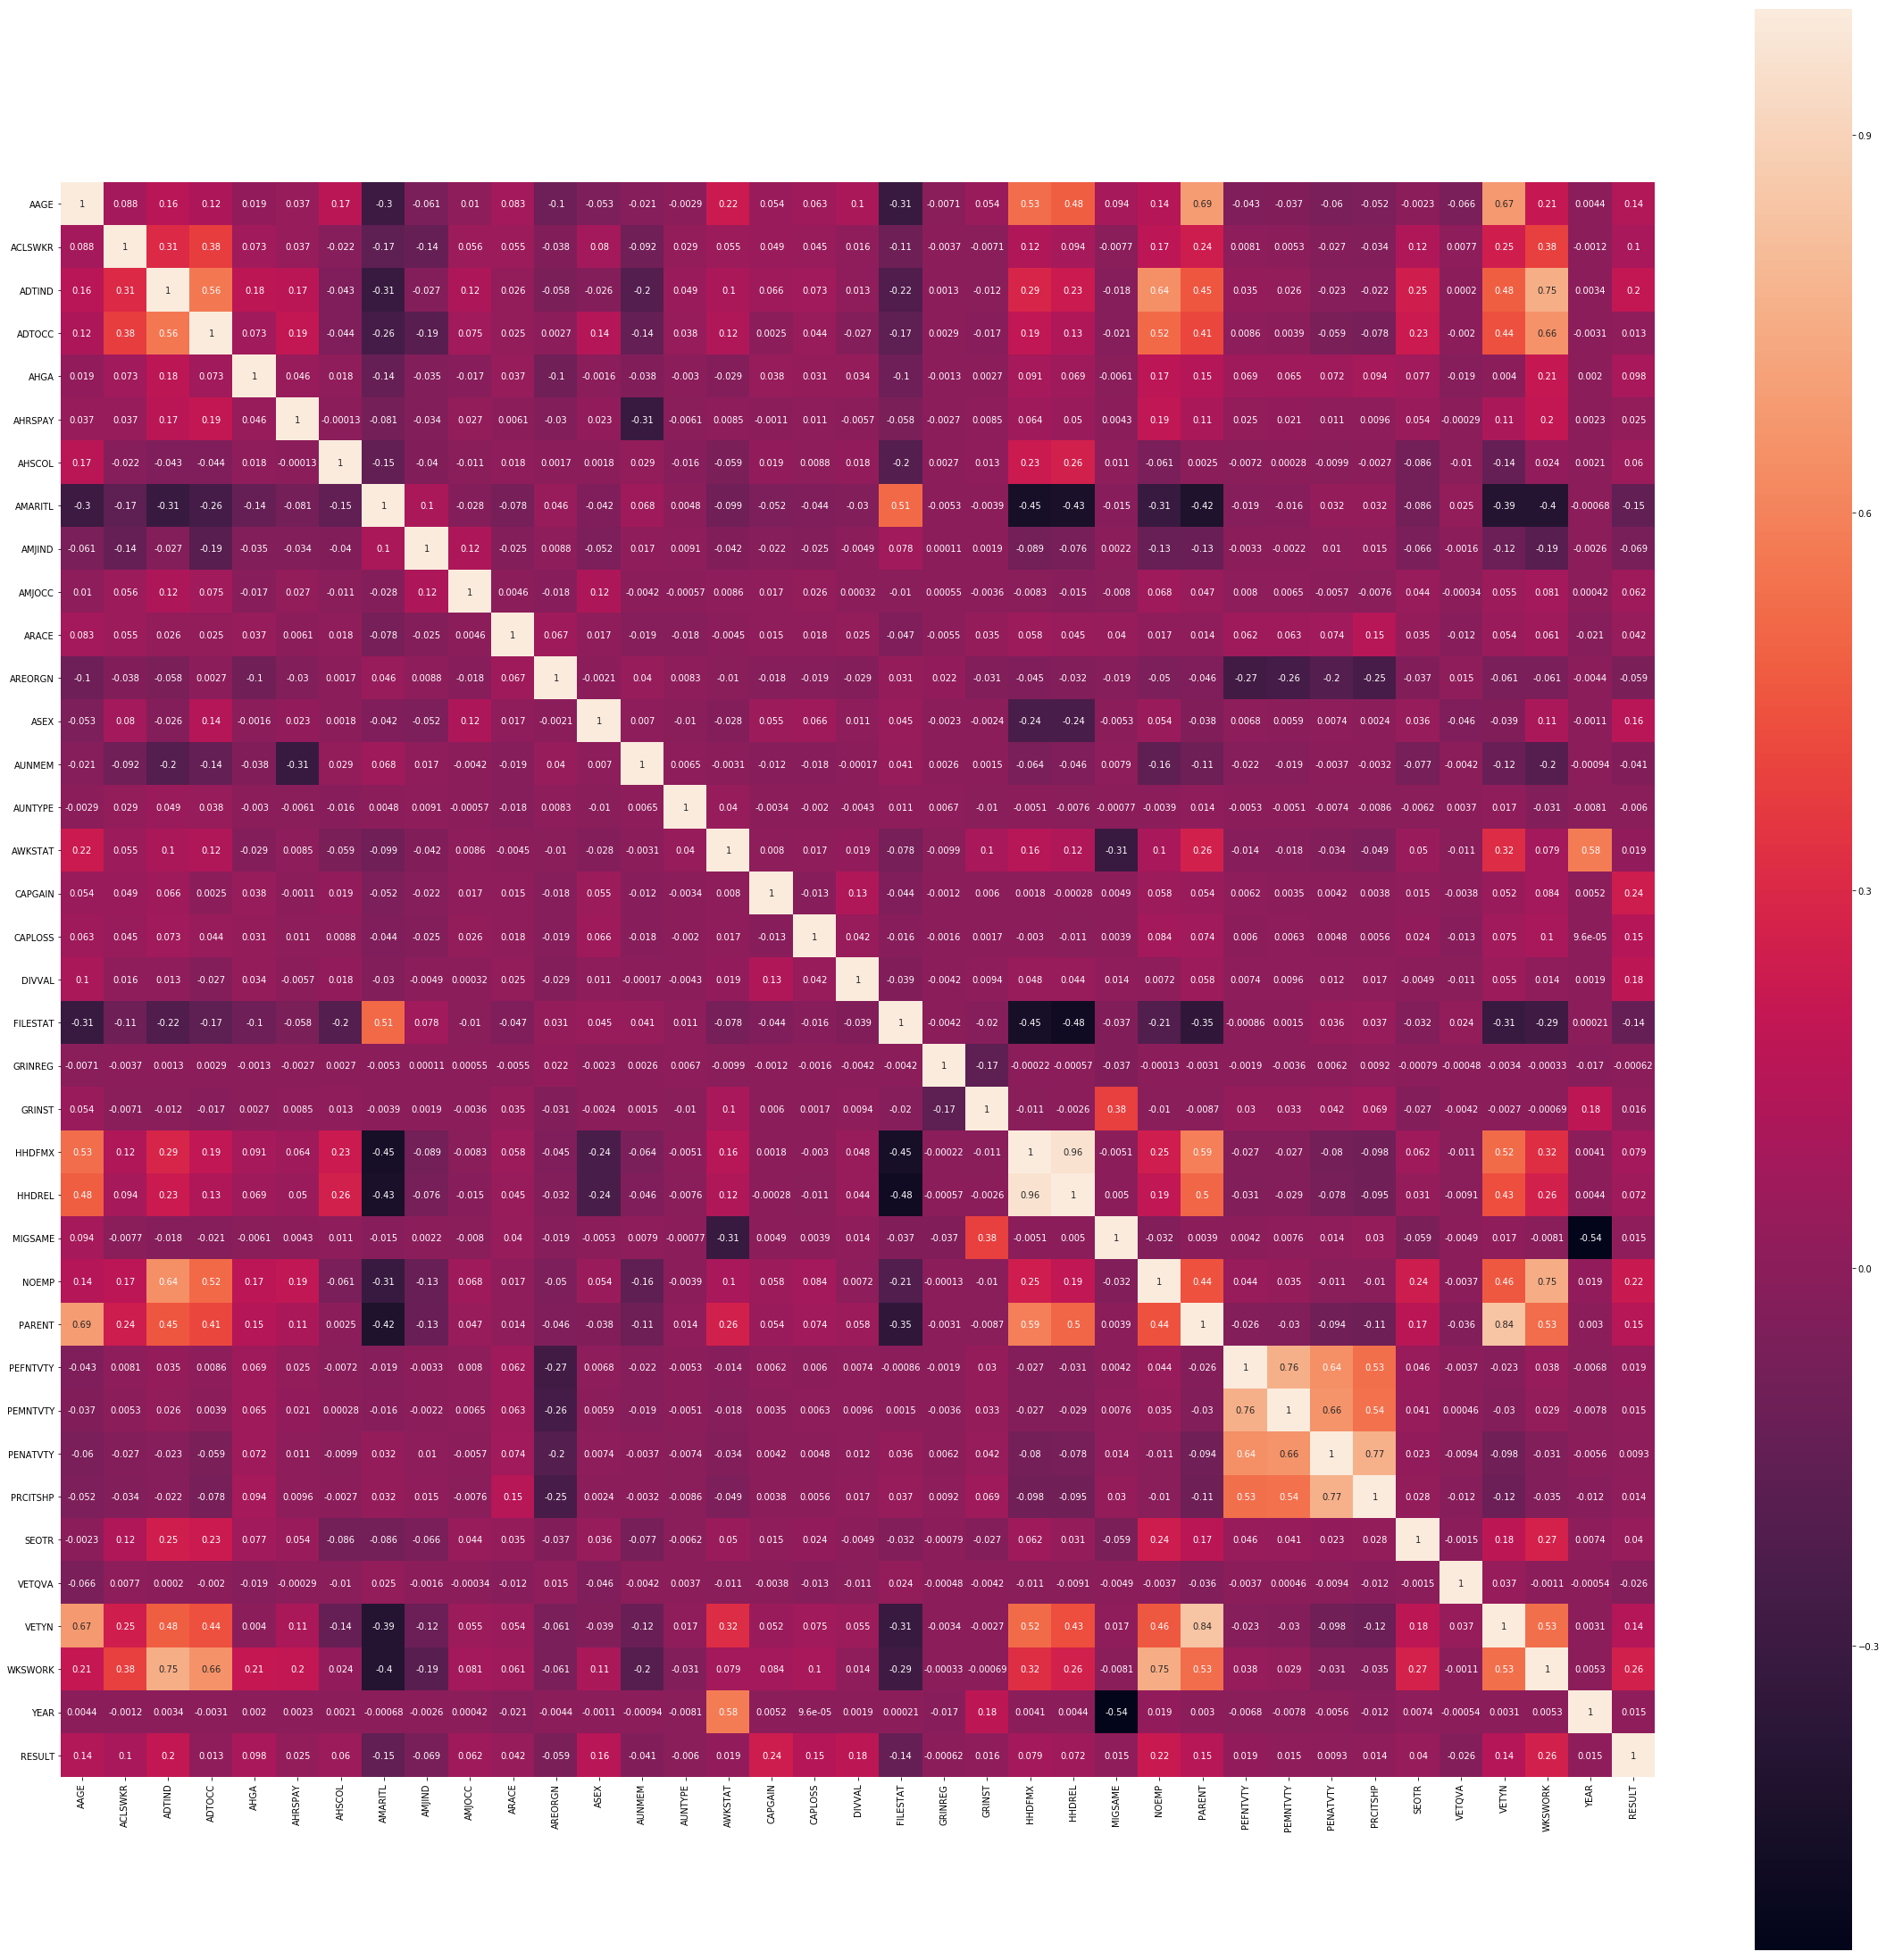

In [279]:
plt.figure(figsize=(40,40))
sns.heatmap(train_df.corr(), vmax=1.0, square=True, annot=True)

It seems that the country of birth of the father, mother, self and the citizenship are related (which make sense), and could probably be merged into only 1 or 2 new features. Same for HHDFMX and HHDREL.

Furthermore, the pack "ADTOCC - ADTIND - NOEMP - HHDFMX - AAGE - PARENT - VETYN - WKSWORK" also seems related somehow (more than 0.5 or less than -0.5). It makes sense in the way that the Veteran are often 'old' people, that the worker (who have WKSWORK > 0) are adults, etc...

The data engineering is my biggest weak point because I don't have enough statistic bagage to manipulate the features for the best.

I still struggle on the data cleaning part, I started to learn Python for some weeks and the data manipulation is quite different from C's data manipulation (which I am more used to work with).

## Model

I'll divide my train_df to get a cross validation sample (around 30% train, 30% validate and 30% test), to compare the different model I will test. Therefore the results on the test set will be accurate.

In [280]:
validation_df = train_df[:90000]
train_df = train_df[90000:]
validation_tree = train_tree[:90000]
train_tree = train_tree[90000:]


train_tree_Y = train_tree.RESULT
train_tree_X = train_tree
del train_tree_X['RESULT']

validation_tree_Y = validation_tree.RESULT
validation_tree_X = validation_tree
del validation_tree_X['RESULT']

test_tree_Y = test_tree.RESULT
test_tree_X = test_tree
del test_tree_X['RESULT']


train_Y = train_df.RESULT
train_X = train_df
del train_X['RESULT']

validation_Y = validation_df.RESULT
validation_X = validation_df
del validation_X['RESULT']

test_Y = test_df.RESULT
test_X = test_df
del test_X['RESULT']

print (train_X.shape , validation_X.shape , train_Y.shape , validation_Y.shape , test_df.shape)

(109522, 36) (90000, 36) (109522,) (90000,) (99761, 36)


Because it is a two class classification problem, I'll begin with the Logistic Regression model and the Decision Tree model. It is fast to train and will give me an idea of the average accuracy.

In [295]:
clf_gini = DecisionTreeClassifier(criterion = "gini", min_samples_leaf=100)
clf_gini.fit(train_X, train_Y)
prediction_gini = clf_gini.predict(validation_X)
print(accuracy_score(validation_Y, prediction_gini))

0.949977777778


In [296]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", min_samples_leaf=100)
clf_entropy.fit(train_X, train_Y)
prediction_entropy = clf_entropy.predict(validation_X)
print(accuracy_score(validation_Y, prediction_entropy))

0.950133333333


I don't really get the difference between this 2 kind of decision tree but they give me different results, so I will choose the most performing one.

In [226]:
model = LogisticRegression()
log = model.fit(train_X, train_Y)
hist = log.predict(validation_X)
print (model.score( train_X , train_Y ) , model.score( validation_X , validation_Y ))

0.947535654937 0.947977777778


95% of correct prediction seems quite good, I'll do a quick Gaussian Naive Bayes to have a second look

In [227]:
model_bis = GaussianNB()
log_bis = model_bis.fit(train_X, train_Y)
hist_bis = log_bis.predict(validation_X)
print (model_bis.score( train_X , train_Y ) , model_bis.score( validation_X , validation_Y )) 

0.78026332609 0.7772


It doesn't seem to work as well as the logistic regression.
But because there is only 6% of 'positive' label (over the 50k limit), a algorithm predicting 0 whatever the input will already have 94% of accuracy.
A better way to look at this two-class classification may be to look at it as a anomaly detection problem, and rather than evaluate the accuracy, I will evaluate the models with the F1-score.

In [228]:
def F1score(prediction, solution):
    if np.size(prediction) != np.size(solution):
        print("not same size")
        return 0
    predicted_positive = np.sum(prediction)
    real_positive = np.sum(solution)
    if predicted_positive >= real_positive:
        true_positive = np.size(prediction) - np.count_nonzero(prediction * 10 - solution - 9)
    else:
        true_positive = np.size(prediction) - np.count_nonzero(solution * 10 - prediction - 9)
    precision = true_positive / predicted_positive
    recall = true_positive / real_positive
    return 2 * precision * recall / (precision + recall)

To get an idea, I evaluate the previous models with the F1score

In [297]:
print(F1score(hist, validation_Y))
print(F1score(hist_bis, validation_Y))
print(F1score(prediction_gini, validation_Y))
print(F1score(prediction_entropy, validation_Y))

0.385080115577
0.315678110709
0.491873589165
0.482591653217


The logistic regression result isn't finally that good, but the decision tree is average. Maybe an anomaly detection algorithm will perform better.

In [230]:
from sklearn.metrics import f1_score #discovered later that the f1score function already exist
def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma
    
def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

def selectThresholdByCV(probs,gt):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    stepsize = (max(probs) - min(probs)) / 1000;
    epsilons = np.arange(min(probs),max(probs),stepsize)
    #print(epsilons)
    for epsilon in np.nditer(epsilons):
        predictions = (probs < epsilon)
        f = f1_score(gt, predictions, average = "binary")
        if f > best_f1:
            best_f1 = f
            best_epsilon = epsilon
    return best_f1, best_epsilon

I check which points is going to be considered as an anomaly and then compare with the actual anomaly value.

In [231]:
n_training_samples = train_X.shape[0]
n_dim = train_X.shape[1]
mu, sigma = estimateGaussian(train_X)
p = multivariateGaussian(train_X,mu,sigma)
p_cv = multivariateGaussian(validation_X,mu,sigma)
fscore, ep = selectThresholdByCV(p_cv,validation_Y)

/Users/tlenglin/Library/Python/3.4/lib/python/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


A warning appears because once epsilon reach a limit value, no points are considered as anomaly.

In [232]:
fscore

0.14103503487204541

This model seems to perfom not as well as the others, but to be more effective, the features need to be normalized.

In [233]:
def feature_normalize(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return (dataset - mu)/sigma

In [234]:
norm_train_X = feature_normalize(train_X)
norm_validation_X = feature_normalize(validation_X)

mu, sigma = estimateGaussian(norm_train_X)
p = multivariateGaussian(norm_train_X,mu,sigma)
p_cv = multivariateGaussian(norm_validation_X,mu,sigma)
fscore, ep = selectThresholdByCV(p_cv,validation_Y)
outliers = np.asarray(np.where(p < ep))

/Users/tlenglin/Library/Python/3.4/lib/python/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [235]:
fscore

0.14074494539950264

The normalization didn't help finally.
A probably good continuation could be to operate a PCA in order to "improve" the features by making them less numerous, more meaningful and more "weighty".

## Final Test
Among the models tested, the Decision Tree model was the best so we will run it on the test set.

In [298]:
result = clf_gini.predict(test_X)
print(accuracy_score(test_Y, result))
print(F1score(result, test_Y))

0.95032126783
0.499191592563


As expected, we have almost 95% accuracy et almost 0.5 on the F1score. 

The model/testing part are my favorite part of this kind of work. It feels really rewarding when you find a way to improve your model. 
As I self-taught my knowledge in machine-learning, it is still precarious and I probably didn't use correctly or with the optimum flag the model which probably cost me some accuracy.

I tried to make a Neural Network but the processing was too long (with only 20% of the data) and the performance were below the others, so I didn't keep up playing with the hyper parameters. 